#### Ex 3) Parte I

A empresa Passarinho Ltda. faz dois tipos de ração animal, a ração forte e a ração light. O Custo calculado para produzir um kg de ração forte é de R$\$\,$ 6,00 e da ração light é de R$ 10,00. Percebeu-se que o tipo de produção exigia que a diferença entre as quantidades de ração deveria ser no máximo 2kg, sendo que a ração light deve ser produzida em maior quantidade. A mão de obra para produzir um Kg da ração forte é uma pessoa e para produzir um kg de ração light são necessárias duas pessoas, sabe-se que a empresa tem disponível para isso pelo menos um funcionário, podendo utilizar quantas pessoas forem necessárias para a produção final. A produção da ração forte está limitada em 5kg e a ração light está limitada em 6kg. Para esta produção utiliza-se 2 insumos. A ração forte utiliza 3 unidades do insumo 1 e 5 unidades do insumo 2 para cada kg de ração produzido. Por sua vez, a ração light utiliza 5 unidades do insumo 1 e 4 unidades do insumo 2. Os insumos possuem vencimentos curtos e o mínimo que deve ser utilizado do insumo 1 é 15kg e o mínimo que deve ser utilizado do insumo 2 é 20kg.

***Premissa:*** Minimizar o custo

#### Processo de Modelagem
##### 1) Variáveis de Decisão:

*Generalizado:*

Variável de Decisão:
* $x_i$: Quantidade da ração do tipo ***i*** a ser produzida, em kg

Índices
* $i$: Ração do tipo *i*
* $j$: Recurso *j* consumido para produzir uma unidade da ração do tipo *i*

Extensão dos Conjuntos dos Índices
* $n$: Tipos diferentes de produtos considerados
* $m$: Quantidade de recursos necessários para produzir os produto considerados

*Aplicado ao Problema:*
* $x_1$: Quantidade de ração to tipo Forte (***1***) a ser produzida
* $x_2$: Quantidade de ração to tipo Light (***2***) a ser produzida


#### 2) Parâmetros

****IMPORTANTE:*** Daqui em diante a modelagem será apresentada na forma *generalizada* devido à extensão dos problemas.

***Consumo de Recursos***

*Generalizado*
* $CONSUMO_{ij}$: consumo unitário do recurso *j* para a produção de uma unidade do produto *i*

*Aplicado ao Problema*
* $CONSUMO_{11}$: consumo unitário do mão-de-obra para produzir uma unidade do produto *1*
* $CONSUMO_{12}$: consumo unitário do insumo 1 para produzir uma unidade do produto *1*
* $CONSUMO_{13}$: consumo unitário do insumo 2 para produzir uma unidade do produto *1*
* $CONSUMO_{21}$: consumo unitário do mão-de-obra para produzir uma unidade do produto *2*
* $CONSUMO_{22}$: consumo unitário do insumo 1 para produzir uma unidade do produto *2*
* $CONSUMO_{23}$: consumo unitário do insumo 2 para produzir uma unidade do produto *2*

***Custo***

*Generalizado*
* $CUSTO_i$: custo de produção uma unidade da ração do tipo $i$, em R\$

*Aplicado ao Problema*
* $CUSTO_1$: custo de produção de uma unidade da ração do tipo *1*, R\$ 6,00/un
* $CUSTO_2$: custo de produção de uma unidade da ração do tipo *2*, R\$ 10,00/un


***Disponibilidade de Recursos***

*Generalizado*
* $DISPONIBILIDADE_j$: disponibilidade do recurso *j*, un

*Aplicado ao Problema*
* $DISPONIBILIDADE_1$: disponibilidade de mão-de-obra, sem limite
* $DISPONIBILIDADE_2$: disponibildiade do insumo 1, 15 un
* $DISPONIBILIDADE_3$: disponibildiade do insumo 2, 20 un

***Limite de Produção***

*Generalizado*
* $LIMITEPRODUÇÃO_i$: limite de produção da ração to tipo *i*, em kg

*Aplicado ao Problema*
* $LIMITEPRODUÇÃO_1$: limite de produção da ração to tipo *1*, 5 kg
* $LIMITEPRODUÇÃO_2$: limite de produção da ração to tipo *2*, 6 kg

#### 3) Função Objetivo

***Objetivo:*** Minimizar o custo de produção

*Função Objetivo - Generalizada:*

$$ min \, Z = \sum_{i = 1} ^{n} CUSTO_i x_i $$


#### 4) Restrições

***Restrições Generalizadas***

1) Restrição de consumo mínimo do recurso *j*

\begin{gathered}
\begin{aligned}
&\sum_{i=1}^{n}\sum_{j=1}^{m} CONSUMO_{ij} x_i \geq DISPONIBILIDADE_j &
\end{aligned}
\end{gathered}

2) Restrição de limite de produção da ração *i*

\begin{gathered}
\begin{aligned}
&x_i \leq LIMITEPRODUÇÃO_i &
\end{aligned}
\end{gathered}

3) Restrição de diferença de produção entra a ração *i+1* e *i*

\begin{gathered}
\begin{aligned}
&x_{i+1} - x_{i} \leq 2 &
\end{aligned}
\end{gathered}

4) Restrição de não-negatividade

\begin{aligned}
&x_i \geq 0
\end{aligned}


#### 5) Formulação Matemática Formal

$\displaystyle\ min \, Z = \sum_{i = 1} ^{n} CUSTO_i x_i $


$\displaystyle s.t. $

$\displaystyle\sum_{i=1}^{n}\sum_{j=1}^{m} CONSUMO_{ij} x_i \geq DISPONIBILIDADE_j $ $\,\,\,$ $\forall$ *i* $=1,...,n,$ $\,$ $\forall$ *j* $=1,...,m $

$\displaystyle\ x_{i+1} - x_{i} \geq 2 $ $\,\,\,$ $\forall$ *i* $ =1 $

$\displaystyle\ x_{i+1} - x_{i} > 0 $ $\,\,\,$ $\forall$ *i* $ =1 $

$\displaystyle\ x_i \leq LIMITEPRODUÇÃO_i $ $\,\,\,$ $\forall$ *i* $ =1,...,n $

$\displaystyle\ x_i \geq 0 $ $\,\,\,$ $\forall$ *i* $ =1,...,n $

#### 6) Implementação Generalizada - gurobipy



In [386]:
# Importando gurobipy API
import gurobipy as gp

# Restrição 1: Criando parâmetros de recursos disponíveis (mínimo a ser utilizado) - RHS
recurso, disponibilidade = gp.multidict({
    "Insumo 1": 15,
    "Insumo 2": 20,
    "Funcionários": 1 })

# Restrição 2: Criando parâmetros de capacidade máxima de produção - RHS
racaoCpty, cptyMax = gp.multidict({
    "cptyRacaoForte": 5,
    "cptyRacaoLight": 6 })

# Restrição 1: Parâmetros de recursos demandados (matriz tecnológica) - LHS
consumoRecursos = {
    ("Insumo 1", "RacaoForte"): 3,
    ("Insumo 2", "RacaoForte"): 5,
    ("Insumo 1", "RacaoLight"): 5,
    ("Insumo 2", "RacaoLight"): 4, 
    ("Funcionários", "RacaoForte"): 1,
    ("Funcionários", "RacaoLight"): 2 }

# Restrição 2: Parâmetros de capacidade máxima (matriz tecnológica) - LHS
cptyProducao = {
    ("cptyRacaoForte", "RacaoForte"): 1,
    ("cptyRacaoLight", "RacaoLight"): 5}

# FO: riando parâmetros de custo por tipo de ração
tipoRacao, custo = gp.multidict({
    "RacaoForte": 6,
    "RacaoLight": 10 })

# Criando o modelo
m = gp.Model("Min Custo Produção")

# Criando variáveis de decisão
Qt_tipoRacao = m.addVars(tipoRacao, name = "Tipo de Ração")



In [387]:
# Criando restrições de disponibilidade de recursos
restrDisponib = m.addConstrs(((sum(consumoRecursos[j, i] * Qt_tipoRacao[i] for i in tipoRacao) 
                     >= disponibilidade[j]) for j in recurso), name = 'Restrições de Disponibilidade de Recursos')


In [388]:
# Criando restrições de limite de produção
restrCptyMax = m.addConstrs(((sum(Qt_tipoRacao[i] for i in tipoRacao) 
                     <= cptyMax[j]) for j in racaoCpty), name = 'Restrições de Capacidade Máxima de Produção')


In [389]:
# Criando restrição de diferença aceitável de produção entre Light e Forte

aceitavelDiff = 2

restrDiffAceitavel = m.addConstr((Qt_tipoRacao[tipoRacao[1]] - Qt_tipoRacao[tipoRacao[0]] >= aceitavelDiff), 
                                  name = 'Restrições de Diferença de Produção')


***Observação:***
Note que este é um problema de minimização e a restrição acima não é redundante. Sendo assim, o sinal da diferença foi trocado para ***>=*** de forma a garantir o atendimento da restrição.

In [390]:
# Criando restrição de preferência de produção de Light sobre Forte

restrPrefProd = m.addConstr((Qt_tipoRacao[tipoRacao[1]] - Qt_tipoRacao[tipoRacao[0]] >= 0), 
                            name = 'Restrições de Preferência de Produção')


In [391]:
# Criando função objetivo
m.setObjective(Qt_tipoRacao.prod(custo), gp.GRB.MINIMIZE)

# Setting the number of solutions to find
m.setParam(gp.GRB.Param.PoolSolutions, 10)

# Otimizando o modelo
m.optimize()


Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i5-1135G7 @ 2.40GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 7 rows, 2 columns and 14 nonzeros
Model fingerprint: 0x506d2185
Coefficient statistics:
  Matrix range     [1e+00, 5e+00]
  Objective range  [6e+00, 1e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 2e+01]
Presolve removed 3 rows and 0 columns
Presolve time: 0.01s
Presolved: 4 rows, 2 columns, 8 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.0000000e+01   2.131375e+00   0.000000e+00      0s
       2    4.1333333e+01   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.02 seconds (0.00 work units)
Optimal objective  4.133333333e+01


In [392]:
# Conferindo tipo da solução
if m.status == gp.GRB.OPTIMAL:
    print("The solution is unique.")
elif m.status == gp.GRB.OPTIMAL_INFEASIBLE or m.status == gp.GRB.UNBOUNDED:
    print("The solution is multiple.")
else:
    print("The problem is infeasible or unbounded.")
    
# Checking if the solution is multiple
if m.SolCount > 1:
    print("The solution is multiple.")
else:
    print("The solution is unique.")

The solution is unique.
The solution is unique.


#### 7) Plano de Produção

In [393]:
# Valores das variáveis de decisão
x1 = m.x[0]
x2 = m.x[1]

x1 = round(x1, 2)
x2 = round(x2, 2)

print("Plano de Produção:\n")
print("Tipo de ração a ser produzida e quantidade (un):")
print("Ração ", tipoRacao, ": ", x1, "; ", x2, sep = "")

# Valor da Função Objetivo
print("\nCusto Total: R$", round(m.objVal, 2))

Plano de Produção:

Tipo de ração a ser produzida e quantidade (un):
Ração ['RacaoForte', 'RacaoLight']: 1.33; 3.33

Custo Total: R$ 41.33


#### 8) Representação Gráfica

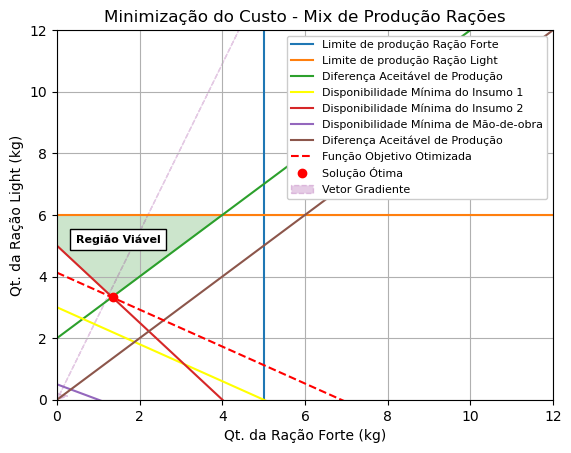

In [394]:
import numpy as np
import matplotlib.pyplot as plt

# Definindo restrições
x = np.linspace(0, 20, 20)

y1 = 5 - x/1000000 # Limite de produção de x1
y2 = 6 - x/1000000 # Limite de produção de x2
y3 = 2 + x # Diferença Aceitável de Produção
y4 = (15 - 3 * x) / 5 # Disponibilidade Mínima do Insumo 1
y5 = (20 - 5 * x) / 4 # Disponibilidade Mínima do Insumo 2
y6 = (1 - x) / 2 # Disponibildiade Mínima de Mão-de-obra
y8 = x # Restrição modificada para tornar o problema válido, conforme discutido em sala

# Plotando restriçõies
plt.plot(y1, x, label='Limite de produção Ração Forte')
plt.plot(x, y2, label='Limite de produção Ração Light')
plt.plot(x, y3, label='Diferença Aceitável de Produção')
plt.plot(x, y4, label='Disponibilidade Mínima do Insumo 1', color="yellow")
plt.plot(x, y5, label='Disponibilidade Mínima do Insumo 2')
plt.plot(x, y6, label='Disponibilidade Mínima de Mão-de-obra')
plt.plot(x, y8, label='Diferença Aceitável de Produção')


# Plotando função objetivo otimizada
y7 = (41.25 - 6 * x) / 10
plt.plot(x, y7, label='Função Objetivo Otimizada', color='red', linestyle='--')

# Plotando a solução ótima
plt.plot(1.35, 3.32, 'ro', label='Solução Ótima')

# Plotando a reigão viável
x1 = [1.33, 0, 0, 4]
x2 = [3.33, 5, 6, 6]
plt.fill(x1, x2, color='green', alpha=0.2)

plt.text(0.45, 5.1, 
         'Região Viável', 
         fontsize=8, 
         fontweight='bold',
         bbox=dict(facecolor='white', alpha=1))

# Deifinindo os limites dos eixos x1 e x2
plt.xlim(0, 12)
plt.ylim(0, 12)

# Criando títulos do eixos e do gráfico
plt.xlabel('Qt. da Ração Forte (kg)')
plt.ylabel('Qt. da Ração Light (kg)')
plt.title('Minimização do Custo - Mix de Produção Rações')

## Plotando o vetor gradiente
ax1 = 5.5
ax2 = 15

plt.arrow(ax1, ax2, -5.5, -15,
          length_includes_head=True, 
          head_width=0.4, 
          head_length=0.2, 
          color='purple', 
          label='Vetor Gradiente',
          alpha=0.2,
          linewidth=1,
          linestyle='--')

# Adicionando linha de grid e posição da legenda
plt.grid(True)
plt.legend(loc='upper right', fontsize=8, framealpha=1)

# Aprensetando a visualização do gráfico
plt.show()


**Ex 2) Parte II**

Insira, altere, ou exclua algum parâmetro ou restrição de tal forma que o problema se torne com infactível (inviável) e indique essa mudança graficamente (faça outro gráfico).

**Proposição:**

* Alteração da disponibilidade mínima do insumo 2 de 20 kg para 40 kg 
* Alteração do consumo do insumo 2 para produção da ração Light de 5 para 4 unidades
* Alteração do limite de produção da ração Forte de 5 kg para 4 kg
* Alteração do limite de produção da ração Light de 6 kg para 4 kg



#### Representação Gráfica - Problema inviável

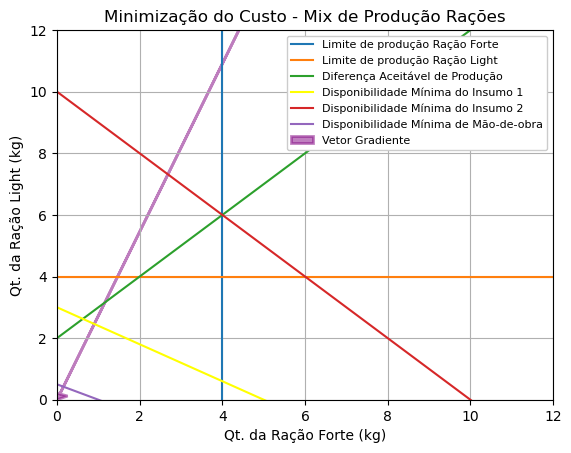

In [395]:
import numpy as np
import matplotlib.pyplot as plt

# Definindo restrições
x = np.linspace(0, 20, 20)

y1 = 4 - x/1000000 # Limite de produção de x1
y2 = 4 - x/1000000 # Limite de produção de x2
y3 = 2 + x # Diferença Aceitável de Produção
y4 = (15 - 3 * x) / 5 # Disponibilidade Mínima do Insumo 1
y5 = (40 - 4 * x) / 4 # Disponibilidade Mínima do Insumo 2
y6 = (1 - x) / 2 # Disponibildiade Mínima de Mão-de-obra

# Plotando restriçõies
plt.plot(y1, x, label='Limite de produção Ração Forte')
plt.plot(x, y2, label='Limite de produção Ração Light')
plt.plot(x, y3, label='Diferença Aceitável de Produção')
plt.plot(x, y4, label='Disponibilidade Mínima do Insumo 1', color="yellow")
plt.plot(x, y5, label='Disponibilidade Mínima do Insumo 2')
plt.plot(x, y6, label='Disponibilidade Mínima de Mão-de-obra')

# Deifinindo os limites dos eixos x1 e x2
plt.xlim(0, 12)
plt.ylim(0, 12)

# Criando títulos do eixos e do gráfico
plt.xlabel('Qt. da Ração Forte (kg)')
plt.ylabel('Qt. da Ração Light (kg)')
plt.title('Minimização do Custo - Mix de Produção Rações')

## Plotando o vetor gradiente
ax1 = 5.5
ax2 = 15

plt.arrow(ax1, ax2, -5.5, -15,
          length_includes_head=True, 
          head_width=0.4, 
          head_length=0.2, 
          color='purple', 
          label='Vetor Gradiente',
          alpha=0.5,
          linewidth=2)

# Adicionando linha de grid e posição da legenda
plt.grid(True)
plt.legend(loc='upper right', fontsize=8, framealpha=1)

# Aprensetando a visualização do gráfico
plt.show()


***Observação:***

Note que a insterção das restrições após as modificações propostas não produz mais uma região de soluções viáveis. Mais especificamente, restrição de disponibilidade mínima a ser consumida do insumoe 2 é a restrição que torna o problema inviável. Mesmo com as alterações dos limites de produção das rações Forte e Light e a redução da região viável, o problema ainda seria viável se não fossem a modificação da restrição de disponibilidade do insumo 2
